In [1]:
import numpy as np
import sympy as sym
from scipy.integrate import quad
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt

# (a)

$$ \vec{E}(\vec{r})=\frac{1}{4\pi \epsilon_0} \int_L \frac{\lambda(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3} dl'$$

$$ \vec{E}(\vec{r})=\frac{1}{4\pi \epsilon_0} \int_L \frac{\lambda(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3} ad\phi$$

$$ \vec{E}(\vec{r})=\frac{1}{4\pi \epsilon_0} a \int_0 ^{2\pi}\frac{\lambda(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3} d\phi$$

$$ \vec{E}(\vec{r})=\frac{1}{4\pi \epsilon_0} \lambda a \int_0 ^{2\pi}\frac{(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3} d\phi = \vec{E}(\vec{r})=\frac{1}{4\pi \epsilon_0} \frac{Q}{2\pi} \int_0 ^{2\pi}\frac{(\vec{r}-\vec{r'})}{|\vec{r}-\vec{r'}|^3} d\phi$$

$$ \vec{r} = (x,y,z)$$
$$ \vec{r'} = (x',y',z')$$

Al apreciar la imagen, y teniendo $a$ como el radio del aro, y midiendo $\phi$ iniciando desde el eje $x$ y avanzando en dirección hacia el eje $y$:
$$ x' = acos(\phi)$$
$$ y' = asin(\phi)$$
$$ z' = 0$$ (ya que el aro es paralelo al plano XY).

Adicionalmente, $\vec{r}-\vec{r'} =  (x-x',y-y',z-z')$. Tal que:
$$\vec{r}-\vec{r'} =  (x-acos(\phi),y-asin(\phi),z)$$

Y por la definición de norma euclidiana se tiene que:
$$|\vec{r}-\vec{r'}| =  \sqrt{(x-acos(\phi))^2 + (y-asin(\phi))^2 + z^2}$$
$$|\vec{r}-\vec{r'}| =  \big((x-acos(\phi))^2 + (y-asin(\phi))^2 + z^2 \big)^{\frac{1}{2}} $$


$$|\vec{r}-\vec{r'}| =  \big( x^2-axcos(\phi)-axcos(\phi)+a^2cos^2(\phi) + y^2-aysin(\phi)-aysin(\phi)+a^2sin^2(\phi) + z^2 \big)^{\frac{1}{2}} $$

$$|\vec{r}-\vec{r'}| =  \big( x^2-2axcos(\phi)+a^2cos^2(\phi) + y^2-2aysin(\phi)+a^2sin^2(\phi) + z^2 \big)^{\frac{1}{2}} $$

$$|\vec{r}-\vec{r'}| =  \big( x^2-2axcos(\phi)+a^2(cos^2(\phi)+sin^2(\phi)) + y^2-2aysin(\phi) + z^2 \big)^{\frac{1}{2}} $$

$$|\vec{r}-\vec{r'}| =  \big( x^2-2axcos(\phi)+a^2 + y^2-2aysin(\phi) + z^2 \big)^{\frac{1}{2}} $$

Reorganizando:

$$|\vec{r}-\vec{r'}| =  \big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi)  \big)^{\frac{1}{2}} $$

Así, tenemos que:

$$|\vec{r}-\vec{r'}|^3 =  \big( x^2+ y^2+ z^2+a^2-2axcos(\phi)-2aysin(\phi)  \big)^{\frac{3}{2}} $$

En este orden, podemos reemplazar en la expresión original para cada variable:

$$E_x(x,y,z)=\frac{1}{4\pi \epsilon_0} \frac{Q}{2\pi} \int_0 ^{2\pi}\frac{x-acos(\phi)}{ \big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

$$E_y(x,y,z)=\frac{1}{4\pi \epsilon_0} \frac{Q}{2\pi} \int_0 ^{2\pi}\frac{y-asin(\phi)}{\big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

$$E_z(x,y,z)=\frac{1}{4\pi \epsilon_0} \frac{Q}{2\pi} \int_0 ^{2\pi}\frac{z}{ \big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

Y, finalmente, para $\frac{Q}{4\pi \epsilon_0} = 1$ se cumple que:

$$E_x(x,y,z)= \frac{1}{2\pi} \int_0 ^{2\pi}\frac{x-acos(\phi)}{ \big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

$$E_y(x,y,z)=\frac{1}{2\pi} \int_0 ^{2\pi}\frac{y-asin(\phi)}{\big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

$$E_z(x,y,z)=\frac{1}{2\pi} \int_0 ^{2\pi}\frac{z}{ \big( x^2+ y^2+ z^2+a^2-2axcos(\phi) -2aysin(\phi) \big)^{\frac{3}{2}}} d\phi$$

# (b)

In [2]:
a = 0.5

In [3]:
def Ex(x,y,z):
    E = 1/(2*np.pi)
    f = lambda phi : (x-a*np.cos(phi)) / (x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    I,_ = quad(f, 0, 2*np.pi)
    
    return E*I
    
def Ey(x,y,z):
    E = 1/(2*np.pi)
    f = lambda phi : (y-a*np.sin(phi)) / (x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    I,_ = quad(f, 0, 2*np.pi)
    
    return E*I

def Ez(x,y,z):
    E = 1/(2*np.pi)
    f = lambda phi : z / (x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi))**(3/2)
    I,_ = quad(f, 0, 2*np.pi)
    return E*I

# (c)

In [4]:
E_c = np.array([Ex(0.6,0.6,1),Ey(0.6,0.6,1),Ez(0.6,0.6,1)])
E_c

array([0.21152494, 0.21152494, 0.43864732])

# (d)

In [5]:
N = 6
X=np.linspace(-0.6,0.6,N)
Y=np.linspace(-0.6,0.6,N)
Z=np.linspace(-0.6,0.6,N)

# (e)

In [6]:
EX = np.zeros((N,N,N))
EY = np.zeros((N,N,N))
EZ = np.zeros((N,N,N))

for i in range(N):
    for j in range(N):
        for k in range(N):
            EX[i,j,k] = Ex(X[i],Y[j],Z[k])
            EY[i,j,k] = Ey(X[i],Y[j],Z[k])
            EZ[i,j,k] = Ez(X[i],Y[j],Z[k])

# (f)

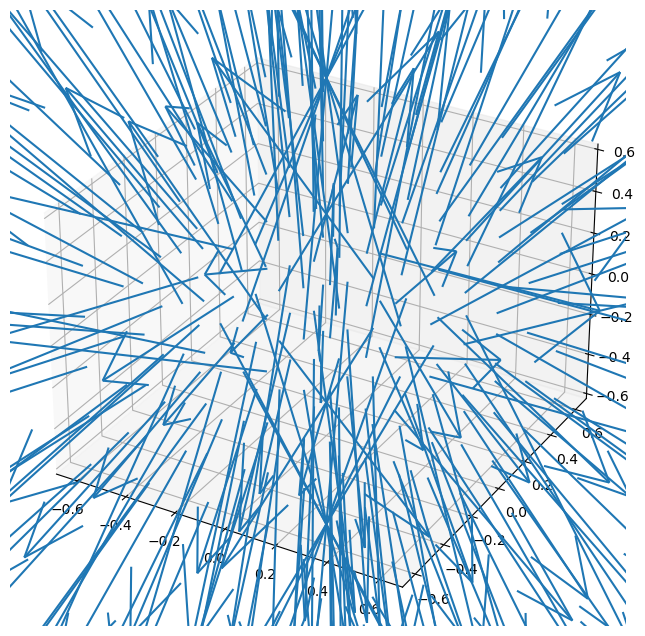

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot( projection = '3d')
for i in range(N):
    for j in range(N):
        for k in range(N):
            ax.quiver(X[i],Y[j],Z[k],EX[i,j,k],EY[i,j,k],EZ[i,j,k])

# (g)

In [8]:
Z[5]

0.6

In [9]:
EX[:,:,5]

array([[-0.44648528, -0.53804445, -0.57663105, -0.57663105, -0.53804445,
        -0.44648528],
       [-0.32282667, -0.3577905 , -0.34807361, -0.34807361, -0.3577905 ,
        -0.32282667],
       [-0.11532621, -0.11602454, -0.1022882 , -0.1022882 , -0.11602454,
        -0.11532621],
       [ 0.11532621,  0.11602454,  0.1022882 ,  0.1022882 ,  0.11602454,
         0.11532621],
       [ 0.32282667,  0.3577905 ,  0.34807361,  0.34807361,  0.3577905 ,
         0.32282667],
       [ 0.44648528,  0.53804445,  0.57663105,  0.57663105,  0.53804445,
         0.44648528]])

In [10]:
EY[:,:,5]

array([[-0.44648528, -0.32282667, -0.11532621,  0.11532621,  0.32282667,
         0.44648528],
       [-0.53804445, -0.3577905 , -0.11602454,  0.11602454,  0.3577905 ,
         0.53804445],
       [-0.57663105, -0.34807361, -0.1022882 ,  0.1022882 ,  0.34807361,
         0.57663105],
       [-0.57663105, -0.34807361, -0.1022882 ,  0.1022882 ,  0.34807361,
         0.57663105],
       [-0.53804445, -0.3577905 , -0.11602454,  0.11602454,  0.3577905 ,
         0.53804445],
       [-0.44648528, -0.32282667, -0.11532621,  0.11532621,  0.32282667,
         0.44648528]])